# Partie 1 Régression logistique

In [67]:
## Prétraitement des données

import pandas as pd

titanic=pd.read_csv('titanic-passengers.csv',sep=";")

In [68]:
titanic=titanic[['Survived','Pclass','Sex','Age']]


In [69]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
titanic['Survived']=encoder.fit_transform(titanic['Survived'])

In [70]:
titanic.dropna(axis=0, inplace=True) #pour remplacer les valeurs manquantes
titanic['Sex'].replace(['male','female'],[0,1], inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age
0,0,2,0,28.0
1,0,3,0,25.0
2,0,3,0,20.0
3,0,3,1,29.0
4,0,1,0,31.0


In [71]:
#1. Appliquez la régression logistique. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#features extraction
x = titanic[['Pclass', 'Sex','Age']]
y =titanic['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
#fractionnement des données avec une taille de test de 25%

logreg = LogisticRegression() #construire notre modèle logistique

logreg.fit(x_train, y_train)  #Ajustement des données d'entraînement

y_pred  = logreg.predict(x_test) ##Tester les performances du modèle

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.81


In [72]:
#On a une précision de 81% ce qui veut dire 81% du temps notre modèle effectue une bonne prédiction,il arrive à prédire si un passager a survécu ou malheureusement non

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

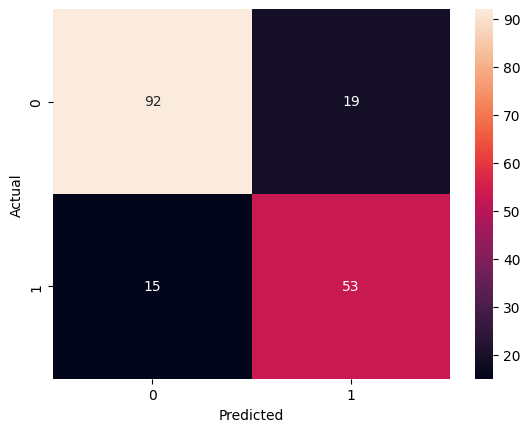

In [73]:
#Utilisons la matrice de confusion pour valider votre modèle
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       111
           1       0.74      0.78      0.76        68

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [77]:
#Une autre matrice de validation pour la classification est ROC / AUC , faites vos recherches sur eux, expliquez-les et appliquez-les dans notre cas

from sklearn.metrics import confusion_matrix, roc_curve, auc

print(confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)
print("AUC : ", roc_auc)




[[92 19]
 [15 53]]
AUC :  0.8041202967673555


# Partie 2 KNN

In [81]:
#1. Appliquez le KNN et prédisez votre modèle

from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier()  #construire notre classificateur knn

knn.fit(x,y)      #Entraînement du classificateur KNN

knn.score(x,y)    #Tester les performances du modèle



0.8305322128851541

In [ ]:
##On a une précision de 83% ce qui veut dire 83% du temps notre modèle effectue une bonne prédiction,il arrive à prédire si un passager a survécu ou malheureusement non

In [82]:
#2. Choisissez le nombre optimal de voisins
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.71
Accuracy for k= 2 is: 0.71
Accuracy for k= 3 is: 0.76
Accuracy for k= 4 is: 0.75
Accuracy for k= 5 is: 0.75
Accuracy for k= 6 is: 0.72
Accuracy for k= 7 is: 0.76
Accuracy for k= 8 is: 0.76
Accuracy for k= 9 is: 0.75
Accuracy for k= 10 is: 0.75
Accuracy for k= 11 is: 0.75
Accuracy for k= 12 is: 0.73
Accuracy for k= 13 is: 0.77
Accuracy for k= 14 is: 0.78
Accuracy for k= 15 is: 0.8
Accuracy for k= 16 is: 0.79
Accuracy for k= 17 is: 0.8
Accuracy for k= 18 is: 0.8
Accuracy for k= 19 is: 0.82
Accuracy for k= 20 is: 0.83
Accuracy for k= 21 is: 0.83
Accuracy for k= 22 is: 0.83
Accuracy for k= 23 is: 0.79
Accuracy for k= 24 is: 0.8
Accuracy for k= 25 is: 0.78
Accuracy for k= 26 is: 0.81
Accuracy for k= 27 is: 0.81
Accuracy for k= 28 is: 0.83
Accuracy for k= 29 is: 0.8


In [ ]:
#K=28

Text(0, 0.5, 'Testing Accuracy')

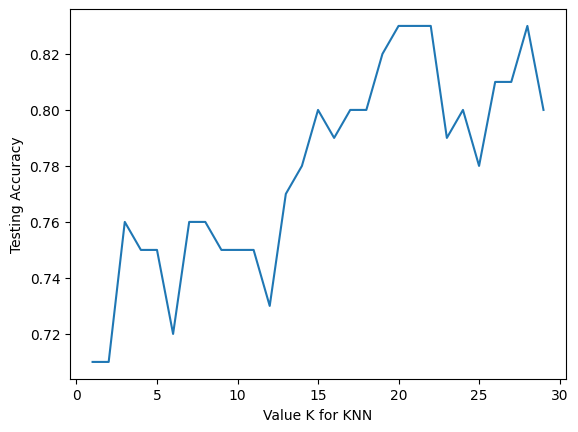

In [83]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

# Partie 3 : Arbre de décision et forêt aléatoire

In [84]:
#1. Appliquez l'arbre de décision et prédisez votre modèle

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

tree.fit(x,y)

tree.score(x,y)

0.896358543417367

In [91]:
#2. Tracez votre arbre de décision et essayez de lire les branches de l'arbre et de conclure une prédiction manuellement.
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("titanic")
graph

ImportError: cannot import name 'graphviz' from 'sklearn.tree' (C:\Users\Hp\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In [92]:
#Utilisez une forêt aléatoire puis modifiez le nombre d'estimateurs

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

clf.fit(x,y)

clf.score(x,y)



0.896358543417367